In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install librosa

In [4]:
import numpy as np
import wave, os, glob
from scipy.io import wavfile
import soundfile as sf
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
 





In [5]:
def wavPlot(s):
  data, sampling_rate = librosa.load(s)
  plt.figure(figsize=(15, 5))
  librosa.display.waveplot(data, sr=sampling_rate)
  
  

In [6]:
def energy(d):
   return np.linalg.norm(d**2)

In [14]:
def ExtractFeatures(data,fs):

  #zero cross rate feature
  Features=np.array([])
 
  zcr=np.mean(librosa.feature.zero_crossing_rate(np.array(data)),axis=0)
  Features=np.hstack((Features,zcr))


 # energy feature of the signal
  #Features=np.hstack((Features,energy(data)))

  #spectral centroid feature


  

  return  Features;






In [54]:
def melspecFeatures(data,fs):
   melspec=np.array([])
   mel=librosa.feature.melspectrogram(data, fs)
   mel=mel.flatten()
   print(mel.shape)
   melspec=np.hstack((melspec,mel))
   
   return mel;


In [60]:

Datafr=pd.DataFrame(columns=['feature'])
Data=pd.DataFrame(columns=['feature'])
SampleRates=[]
emotion=[]
label=[]
i=0
column_names = ["Data", "Label"]
      
pathAudio = ""
path = "/content/drive/MyDrive/Crema/"
files = os.listdir(path)

for filename in sorted(glob.glob(os.path.join(path, '*.wav'))):
  
  data, fs = sf.read(filename, dtype='float32')
  emotion=filename.split("_")
  label.append(emotion[2])     
       # librosa.display.waveplot(data, sr=fs)
  print(i)
      
  
       # playsound("/content/drive/MyDrive/Crema/1006_TAI_SAD_XX.wav")
  x=melspecFeatures(data,fs)
  print(x.shape)     
  Datafr.loc[i]=[ExtractFeatures(data,fs)]
  Data.loc[i]=[melspecFeatures(data,fs)]
  i+=1  
  
  
  SampleRates.append(fs)
      
      


      

         
      


Streaming output truncated to the last 5000 lines.
6192
(12288,)
(12288,)
(12288,)
6193
(9216,)
(9216,)
(9216,)
6194
(13184,)
(13184,)
(13184,)
6195
(12416,)
(12416,)
(12416,)
6196
(10240,)
(10240,)
(10240,)
6197
(13568,)
(13568,)
(13568,)
6198
(11520,)
(11520,)
(11520,)
6199
(12032,)
(12032,)
(12032,)
6200
(8320,)
(8320,)
(8320,)
6201
(9088,)
(9088,)
(9088,)
6202
(7808,)
(7808,)
(7808,)
6203
(9984,)
(9984,)
(9984,)
6204
(10624,)
(10624,)
(10624,)
6205
(8320,)
(8320,)
(8320,)
6206
(11264,)
(11264,)
(11264,)
6207
(11008,)
(11008,)
(11008,)
6208
(12032,)
(12032,)
(12032,)
6209
(8704,)
(8704,)
(8704,)
6210
(11776,)
(11776,)
(11776,)
6211
(11776,)
(11776,)
(11776,)
6212
(9984,)
(9984,)
(9984,)
6213
(8704,)
(8704,)
(8704,)
6214
(11008,)
(11008,)
(11008,)
6215
(9984,)
(9984,)
(9984,)
6216
(8832,)
(8832,)
(8832,)
6217
(7808,)
(7808,)
(7808,)
6218
(9088,)
(9088,)
(9088,)
6219
(8576,)
(8576,)
(8576,)
6220
(7040,)
(7040,)
(7040,)
6221
(9088,)
(9088,)
(9088,)
6222
(7552,)
(7552,)
(7552,)
6223
(70

In [61]:
Datafr=pd.DataFrame(Datafr['feature'].values.tolist())
Data=pd.DataFrame(Data['feature'].values.tolist())


In [62]:

#Replacing Nan values with zeros
Datafr=Datafr.fillna(0)
#Add Labels to the data
Datafr.insert(157, "Label", label, True)
Datafr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,Label
0,0.048340,0.057129,0.067383,0.053223,0.036133,0.035156,0.033203,0.034180,0.038574,0.039062,0.040039,0.058105,0.089844,0.124512,0.137207,0.126953,0.094727,0.064453,0.064453,0.091309,0.147949,0.166016,0.175293,0.149902,0.101074,0.108398,0.112793,0.123535,0.130859,0.122559,0.115234,0.104004,0.084961,0.121094,0.210938,0.268555,0.288086,0.258301,0.182129,0.147949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
1,0.019531,0.031250,0.038086,0.040527,0.038086,0.040527,0.043945,0.043457,0.044434,0.043945,0.048828,0.051270,0.048828,0.044922,0.041016,0.054199,0.088379,0.110352,0.126465,0.126465,0.097168,0.099609,0.151855,0.152344,0.161621,0.141602,0.093750,0.086914,0.084473,0.093750,0.083496,0.076660,0.070312,0.123047,0.229980,0.277832,0.299316,0.255859,0.166992,0.151855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
2,0.016602,0.031738,0.041504,0.041504,0.048340,0.041504,0.043457,0.047852,0.041992,0.041016,0.036621,0.036621,0.034668,0.037598,0.038574,0.039062,0.063477,0.097168,0.123047,0.132812,0.122070,0.113770,0.104004,0.106445,0.114258,0.109375,0.108398,0.102051,0.093262,0.094238,0.225098,0.247070,0.250488,0.253906,0.133301,0.128418,0.141602,0.168457,0.170898,0.160645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FEA
3,0.024902,0.034180,0.049805,0.053711,0.048340,0.050781,0.044922,0.045898,0.043945,0.067871,0.085938,0.091797,0.099609,0.080566,0.074219,0.085938,0.092773,0.088867,0.108887,0.115234,0.128906,0.146484,0.123047,0.100098,0.158691,0.209473,0.233398,0.250977,0.187500,0.140625,0.123535,0.134277,0.140625,0.128906,0.129395,0.111816,0.093262,0.080078,0.066895,0.055664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HAP
4,0.015625,0.024902,0.034180,0.037109,0.063477,0.093262,0.103027,0.103027,0.084473,0.056641,0.075195,0.084473,0.098633,0.102051,0.077637,0.068848,0.058105,0.084473,0.120117,0.133789,0.136230,0.111328,0.099609,0.103027,0.102051,0.119141,0.103027,0.090332,0.092285,0.085938,0.081055,0.131348,0.198730,0.202637,0.216797,0.179199,0.116211,0.108887,0.103027,0.103516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,0.024414,0.032227,0.038574,0.039551,0.034668,0.037109,0.039062,0.036133,0.040039,0.037598,0.045898,0.055664,0.148438,0.290039,0.441406,0.592285,0.647949,0.622559,0.503418,0.388184,0.249512,0.152344,0.134766,0.106445,0.099609,0.084473,0.076660,0.071777,0.066895,0.077148,0.064941,0.055664,0.089355,0.105957,0.109863,0.110352,0.080078,0.059570,0.055664,0.053711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
7438,0.011230,0.021484,0.034180,0.036621,0.036621,0.030273,0.024902,0.025879,0.024902,0.031250,0.031250,0.030762,0.031738,0.033203,0.032227,0.030762,0.036133,0.038574,0.046387,0.046875,0.041992,0.038574,0.038086,0.034668,0.041992,0.0449

In [63]:

#Replacing Nan values with zeros
Data=Data.fillna(0)
#Add Labels to the data
Data.insert(20096, "Label", label, True)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,20057,20058,20059,20060,20061,20062,20063,20064,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20078,20079,20080,20081,20082,20083,20084,20085,20086,20087,20088,20089,20090,20091,20092,20093,20094,20095,Label
0,0.000044,0.000266,0.000579,0.000672,0.000944,0.000397,0.000283,0.000288,0.000517,0.000265,0.000061,0.000180,0.000538,0.006888,0.026408,0.010471,0.000970,0.000288,0.000443,0.001602,0.002689,0.000915,0.000244,0.000513,0.000176,0.000212,0.002235,0.011373,0.013496,0.005037,0.009904,0.008716,0.001468,0.007882,0.010395,0.003339,0.001380,0.001300,0.006562,0.016527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
1,0.003241,0.002799,0.001573,0.001265,0.000945,0.001005,0.001031,0.001009,0.000784,0.001684,0.001614,0.000720,0.000504,0.002346,0.003634,0.000878,0.001448,0.002500,0.002972,0.000847,0.000245,0.000445,0.000866,0.000689,0.000266,0.001027,0.018258,0.020130,0.004143,0.000701,0.000214,0.000184,0.000100,0.000459,0.001056,0.001726,0.001792,0.000620,0.000213,0.000133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
2,0.003268,0.000876,0.000314,0.000847,0.000580,0.000868,0.000768,0.000179,0.000160,0.000442,0.000930,0.001172,0.000483,0.000275,0.000220,0.001109,0.001495,0.000766,0.013808,0.030096,0.007107,0.000897,0.000527,0.000688,0.000548,0.000395,0.002156,0.001747,0.000591,0.000362,0.000494,0.003537,0.008501,0.008476,0.005833,0.004148,0.002699,0.009852,0.008252,0.000697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FEA
3,0.003169,0.000811,0.000257,0.000997,0.000796,0.000576,0.001919,0.002474,0.000681,0.000502,0.002804,0.010949,0.026095,0.005904,0.003008,0.003266,0.000300,0.000422,0.001370,0.004462,0.021532,0.011920,0.003843,0.005982,0.001683,0.004146,0.023188,0.016683,0.002435,0.001526,0.000625,0.000326,0.000200,0.000692,0.000839,0.000469,0.000031,0.000134,0.001199,0.000964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HAP
4,0.003319,0.001745,0.001170,0.003235,0.003108,0.001679,0.001819,0.000850,0.001578,0.002936,0.001904,0.003183,0.001902,0.001448,0.001522,0.001068,0.000270,0.000087,0.000968,0.001957,0.000890,0.000257,0.002935,0.008083,0.004607,0.004500,0.002439,0.001849,0.000969,0.002521,0.003129,0.000930,0.001414,0.001540,0.000507,0.000533,0.000861,0.000332,0.000725,0.001497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,0.000535,0.000719,0.001832,0.010175,0.006644,0.005718,0.005571,0.005830,0.002890,0.001842,0.014981,0.020609,0.007463,0.003546,0.010216,0.007203,0.002652,0.006595,0.014820,0.008443,0.003462,0.004395,0.004236,0.008793,0.013969,0.007182,0.001653,0.005819,0.007659,0.003305,0.004812,0.006633,0.008600,0.001865,0.005858,0.011984,0.012341,0.003397,0.006426,0.008382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
7438,0.007570,0.004233,0.005494,0.003845,0.003014,0.002855,0.003373,0.002128,0.004198,0.005393,0.013333,0.008350,0.003428,0.007985,0.004278,0.007041,0.005603,

In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_SAD_XX.wav")



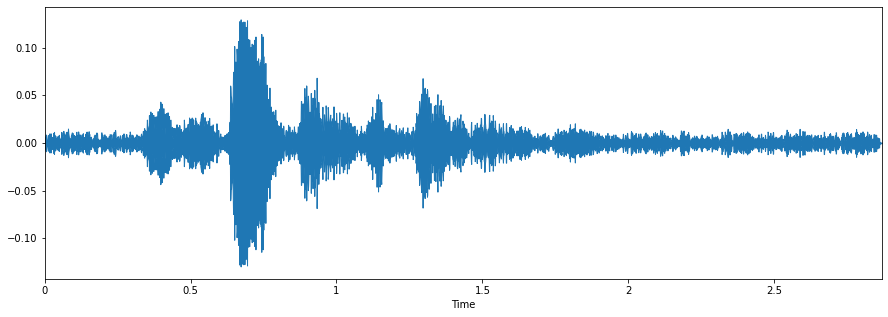

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_SAD_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_DIS_XX.wav")

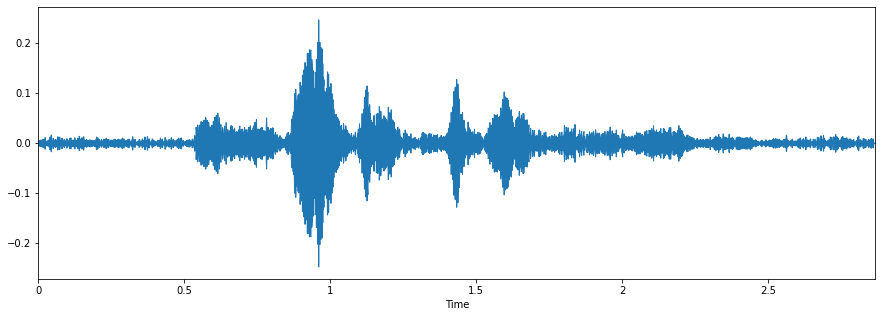

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_DIS_XX.wav")

In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_NEU_XX.wav")

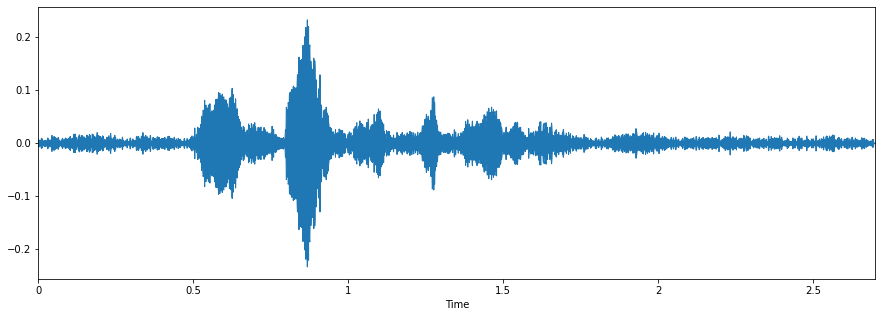

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_NEU_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_ANG_XX.wav")

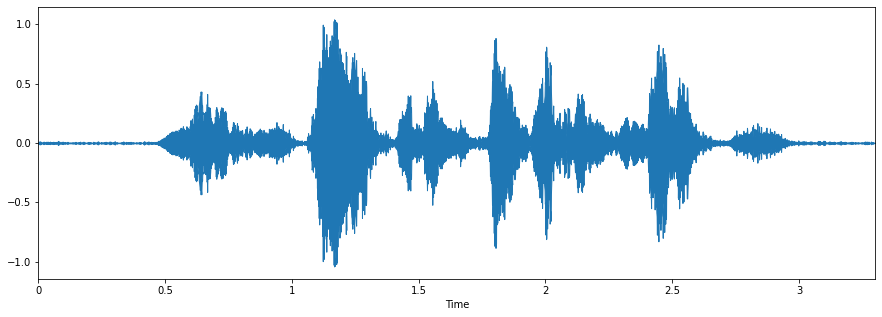

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_ANG_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_FEA_XX.wav")

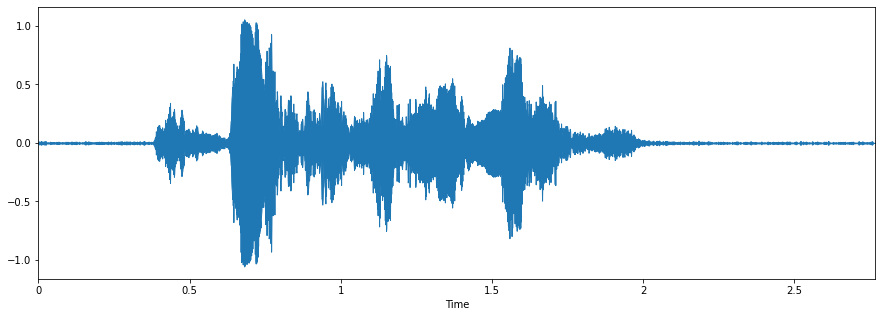

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_FEA_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_HAP_XX.wav")

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_HAP_XX.wav")